# Flight Price Prediction

### Data description

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we have prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

The features are:-

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

We have to build a machine learning model to predict the price of the flight ticket using the above features. 

## Importing libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the datasets

In [229]:
# loading train data

df= pd.read_csv('flight_price_train.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [231]:
# loading test data

test= pd.read_csv('test_set.csv')
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


## EDA 

In [232]:
df.shape

(10683, 11)

Here we have 10683 rows and 11 columns to work with.

### Checking null values

In [233]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In the columns 'Route' and 'Total stops', One null value can be seen in each.

In [234]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


We can see that both the null values are present in the same record. Lets drop the record.

In [235]:
df.drop([9039], inplace = True )

In [236]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now, no null values are present. Lets visualize and see.

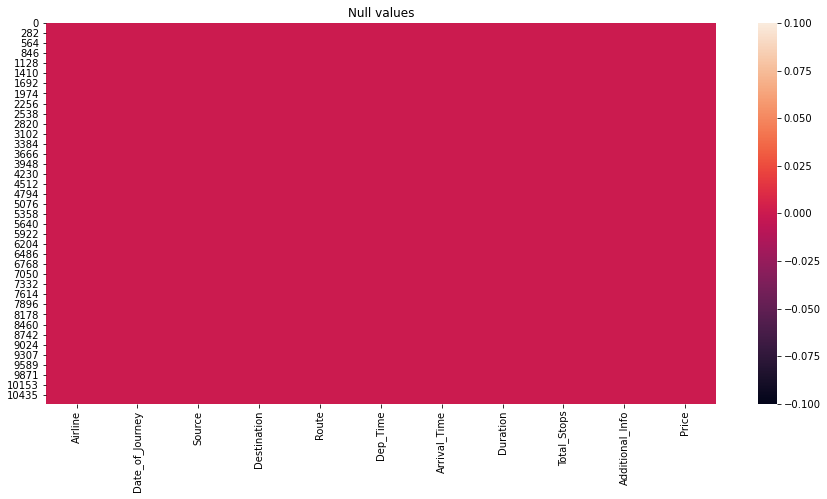

In [237]:
plt.figure(figsize=[15,7])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization, no null values can be seen.

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


All the columns have equal count and all the independent columns are of object datatype.

In [239]:
# Lets check the unique values.

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route
['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR

In [240]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

As we can see nearly 80% of the data in 'additional info' contains 'no info' data. so, using this for our model building will not be usefull. so we need to drop it.

In [241]:
df.drop(['Additional_Info'],axis=1, inplace = True )

In [242]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,12648


In [243]:
df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

The 'date of journey' column is of object datatype and it contains the whole date. We will extract the the date and month from it. The year is same in all the data, so we can leave the year.

In [244]:
# Firstly converting the object datatype to datetime.

df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey']) 

In [245]:
# Extracting the month and date

df['Month']=df['Date_of_Journey'].dt.month 
df['Date']=df['Date_of_Journey'].dt.day

In [246]:
# We have extracted the data, we can drop the 'date of journey' column now.

df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [247]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Date
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,4145,4,27
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,7229,4,27
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,12648,1,3


The column 'Route' contains the source and destination and the total stops in between. All the data present in Route already have their seperate columns. So we can drop the 'Route' column.

In [248]:
df.drop(['Route'], axis=1, inplace=True)

The column 'Dep time' contains the time of departure in hour and minute format, lets extract the hr and min and keep in seperate columns.

In [249]:
# converting object datatype to datetime.

df['Dep_Time']= pd.to_datetime(df['Dep_Time']) 

In [250]:
# Extracting the hour and minute.

df['Dep_hr']=df['Dep_Time'].dt.hour
df['Dep_min']=df['Dep_Time'].dt.minute

In [251]:
# dropping the base column.

df.drop(['Dep_Time'], axis=1, inplace=True)
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Month,Date,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,4145,4,27,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,7229,4,27,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,12648,1,3,11,30


Again, the 'Arrival time' contains the time and date of arrival, The date is not present in all the records, so we will extract the time from the column.

In [252]:
# converting object datatype to datetime.

df['Arrival_Time']= pd.to_datetime(df['Arrival_Time']) 

In [253]:
# Extracting the hour and minute.

df['Arrival_hr']=df['Arrival_Time'].dt.hour
df['Arrival_min']=df['Arrival_Time'].dt.minute

In [254]:
# dropping the base column.

df.drop(['Arrival_Time'], axis=1, inplace=True)

In [255]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Date,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,11,30,14,10


The 'duration' column contains duration of the flight, it is in hr:min format, but it contains text. Lets operate extract data from it.

In [256]:
# Creating list for duration data to perform operations.

Dura = list(df['Duration'])

In [257]:
# Adding 0 hours and 0 minutes, where the data is absent and contains only hour or only minute.

for i in range(len(Dura)):
    if len(Dura[i].split()) != 2:
        if "h" in Dura[i]:
            Dura[i] = Dura[i].strip() + " 0m"
        else:
            Dura[i] = "0h " + Dura[i]

In [258]:
# Adding the list to the dataframe.

df['Dura'] = Dura

In [259]:
# extracting the hour.

df[['Duration hr','Dura_min']] = df.Dura.str.split('h ',1, expand=True)

In [260]:
#extracting the minute.

df[['Duration min','a']] = df.Dura_min.str.split('m',1, expand=True)

In [261]:
# now we drop the unwanted columns.

df.drop(['Duration','Dura','Dura_min','a'], axis=1, inplace= True)
df

,Airline,Source,Destination,Total_Stops,Price,Month,Date,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration hr,Duration min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [262]:
# converting the duration to integer.

df['Duration hr']=df['Duration hr'].astype(int)
df['Duration min']=df['Duration min'].astype(int)

In [263]:
df.dtypes

Airline         object
Source          object
Destination     object
Total_Stops     object
Price            int64
Month            int64
Date             int64
Dep_hr           int64
Dep_min          int64
Arrival_hr       int64
Arrival_min      int64
Duration hr      int32
Duration min     int32
dtype: object

In [264]:
df.describe()

,Price,Month,Date,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration hr,Duration min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,5.534731,12.682925,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,4611.548810,2.987626,8.803800,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


Here we can see all the numeric columns. All the data present here are of date and time, except the target column

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

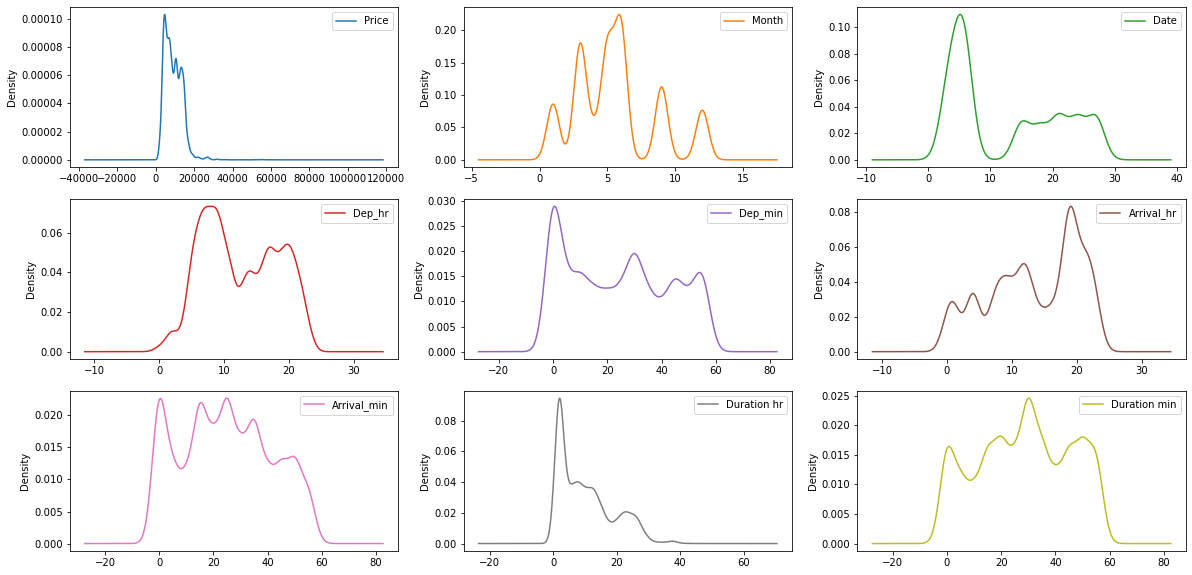

In [265]:
df.plot(kind='density', subplots= True, layout=(3,3),sharex=False, legend=True, figsize=[20,10])
plt.show

Here, we can check the distribution of the numeric columns. lets check closely.

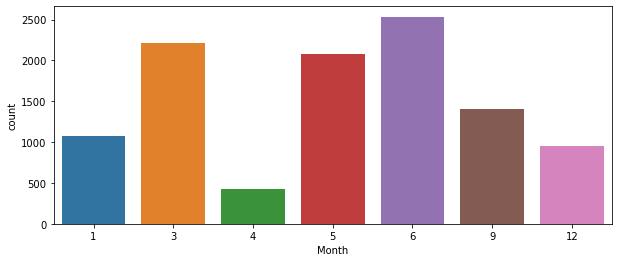

In [266]:
plt.figure(figsize=[10,4])
sns.countplot(df['Month'])
plt.show()

Here we can see most of the journey took place in the month of march and june.

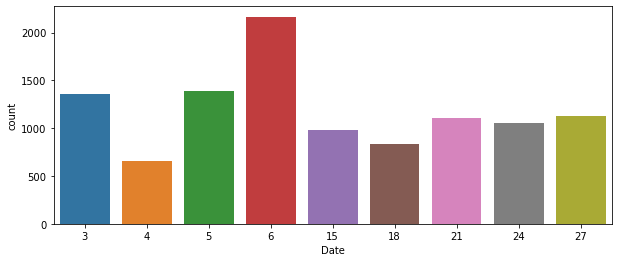

In [267]:
plt.figure(figsize=[10,4])
sns.countplot(df['Date'])
plt.show()

The data shows that majority of the journey takes place on the 6th.

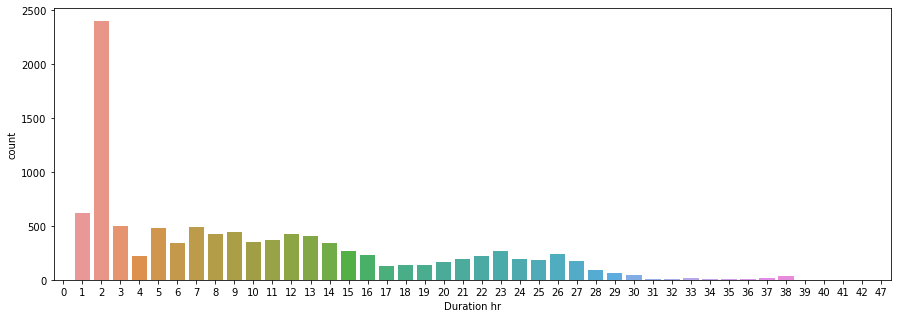

In [268]:
plt.figure(figsize=[15,5])
sns.countplot(df['Duration hr'])
plt.show()

Here the data shows that the majority of the flight journey are of duration 2 hour.

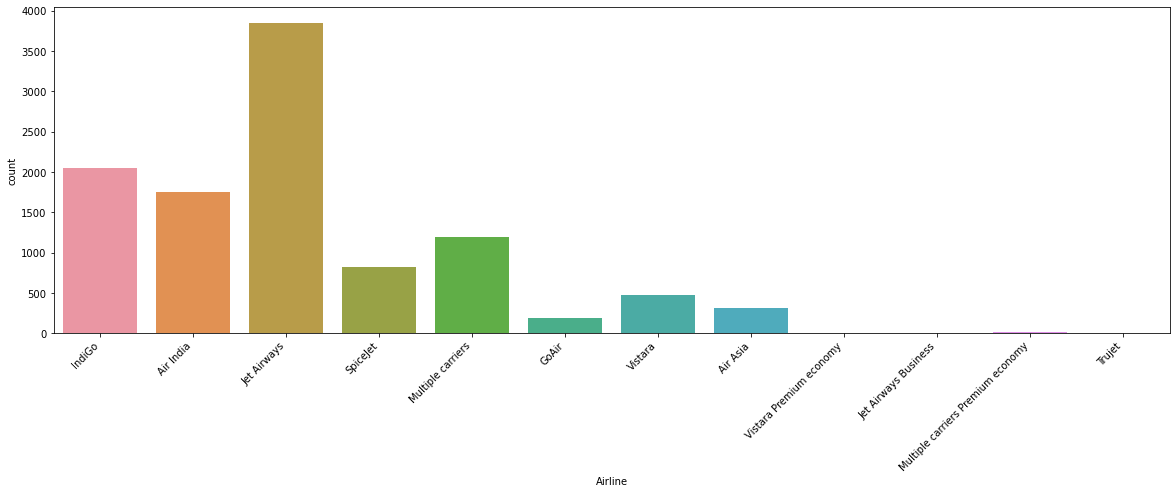

In [269]:
plt.figure(figsize=[20,6])
sns.countplot(df['Airline'])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

The data shows most of the flights operating are of jet airways. And the premium and business class flights operating the least.

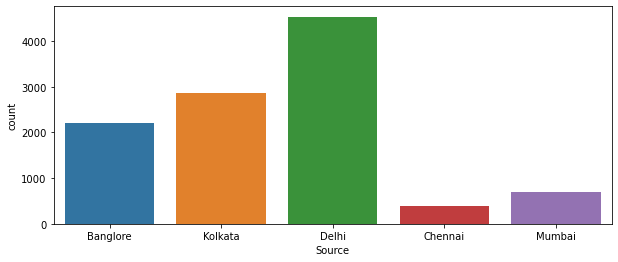

In [270]:
plt.figure(figsize=[10,4])
sns.countplot(df['Source'])
plt.show()

We can see most of the flight source is from Delhi, followed by kolkata.

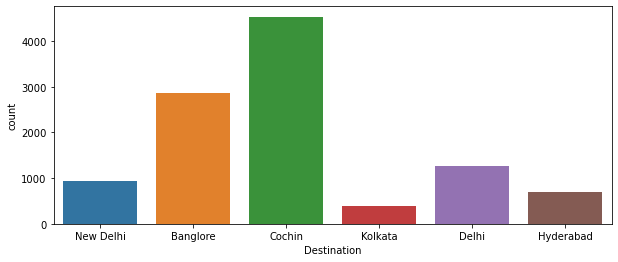

In [271]:
plt.figure(figsize=[10,4])
sns.countplot(df['Destination'])
plt.show()

Here, we can see the destination of most of the flights is cochin, next most is bangalore.

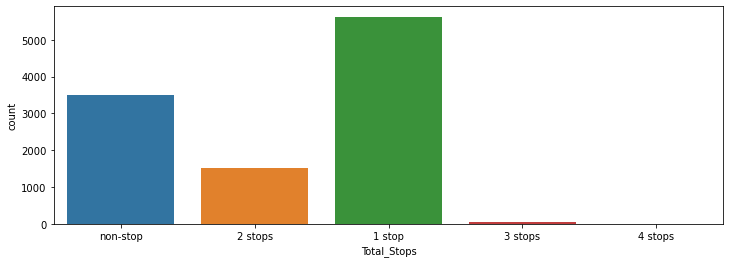

In [272]:
plt.figure(figsize=[12,4])
sns.countplot(df['Total_Stops'])
plt.show()

The data shows that 1 stop flights are most in number, followed by non-stop flights. Flights with 3 and 4 stops are very less.

### Checking correlation

In [273]:
cor= df.corr()
cor

,Price,Month,Date,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration hr,Duration min
Price,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Month,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
Date,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
Dep_hr,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hr,0.024244,-0.004329,-0.002176,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_min,-0.086155,-0.025786,-0.021423,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration hr,0.508778,0.055552,-0.037964,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration min,-0.124855,-0.018597,-0.007708,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


Here we can see the correlation between all the numeric columns, lets visualize it.

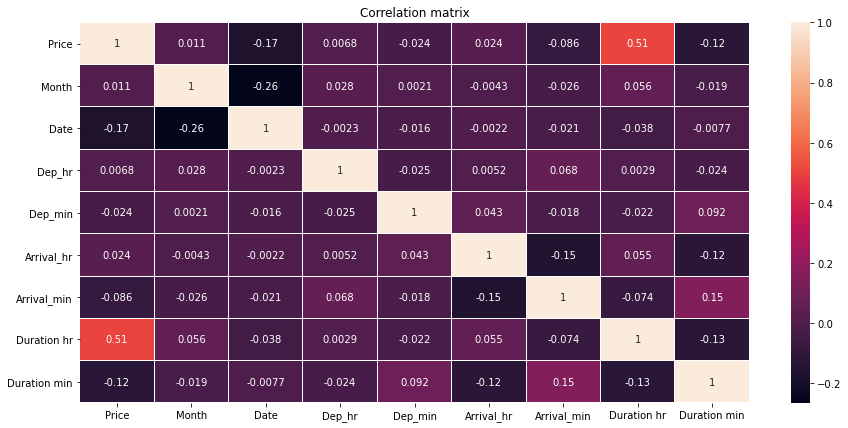

In [274]:
plt.figure(figsize=[15,7])
sns.heatmap(cor, annot=True, linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

In the correlation matrix, we can mostly see negative relations, with only one positive relation. Lets check the correlation of the target with independent columns.

In [275]:
cor['Price'].sort_values(ascending=False)

Price           1.000000
Duration hr     0.508778
Arrival_hr      0.024244
Month           0.010705
Dep_hr          0.006799
Dep_min        -0.024458
Arrival_min    -0.086155
Duration min   -0.124855
Date           -0.165448
Name: Price, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

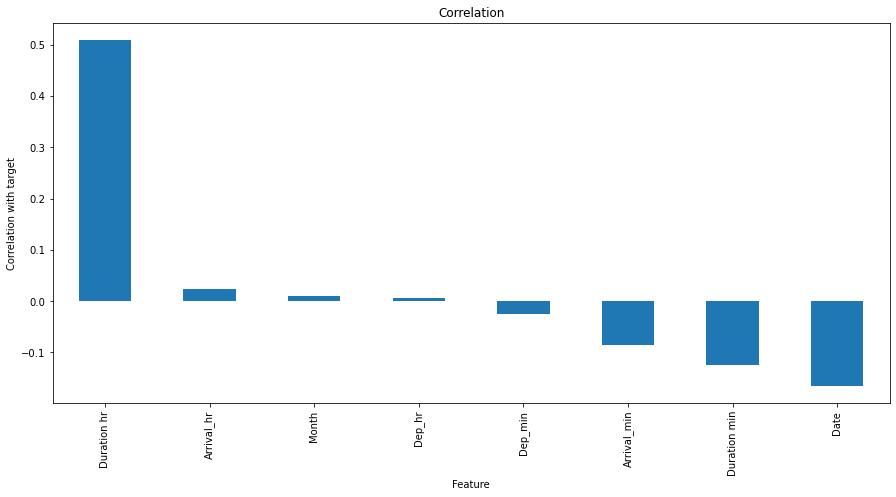

In [276]:
plt.figure(figsize=(15,7))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

The visualization shows that the duration hour has the highest correlation with the target. and the date of journey having the most negative relation. Lets inspect closely.

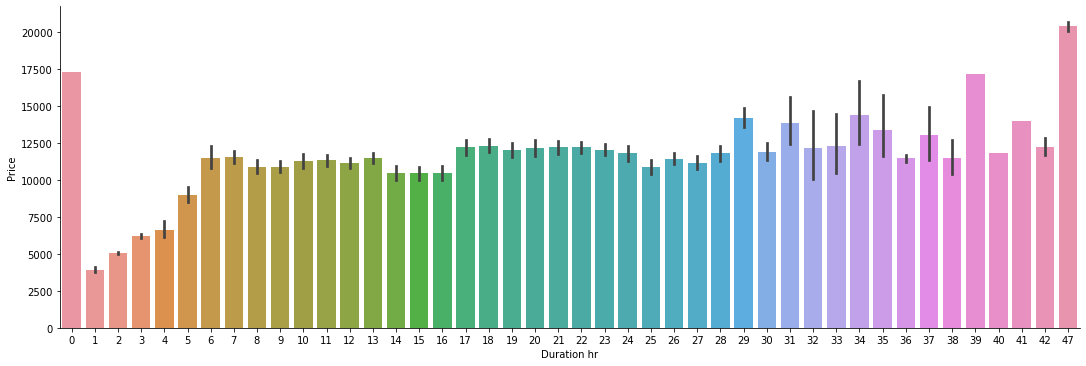

In [277]:
sns.catplot(x='Duration hr',y='Price', data=df, kind='bar', aspect=3);

Here we have a positive correlation, we can see as Duration increases, price also increasing. 

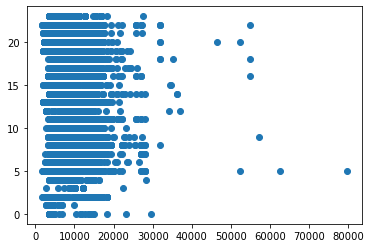

In [278]:
plt.scatter(df['Price'],df['Dep_hr'])
plt.show()

Here we can see no correlation between the price and the departure time.

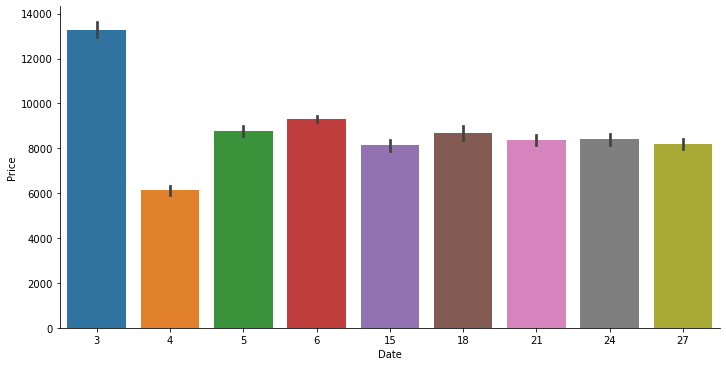

In [279]:
sns.catplot(x='Date',y='Price', data=df, kind='bar', aspect=2);

Here the graph shows a negative relation, The price of flights descreases as a month comes to an end.

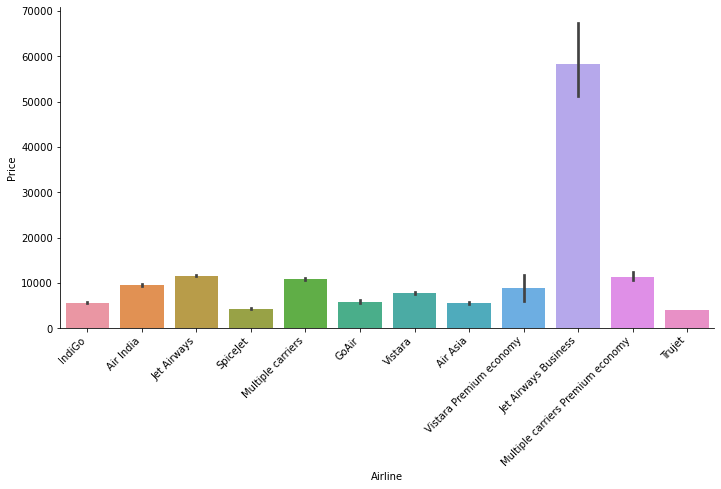

In [280]:
sns.catplot(x='Airline',y='Price',data=df, kind='bar', aspect=2)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Here, the graph shows that the Jet airways business flight is the most expensive among all, with spicejet and Trujet being the least expensive.

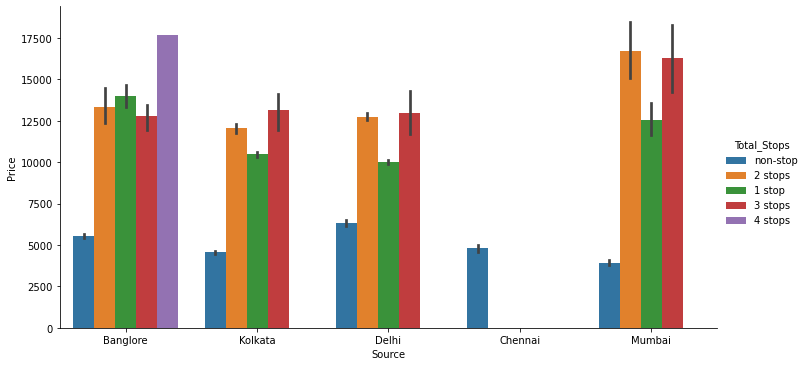

In [281]:
sns.catplot(x='Source',y='Price', hue= 'Total_Stops', data=df, kind='bar', aspect=2);

Here we can see flights that source from mumbai and have 2 or 3 stops in between have a comparatively higher price.

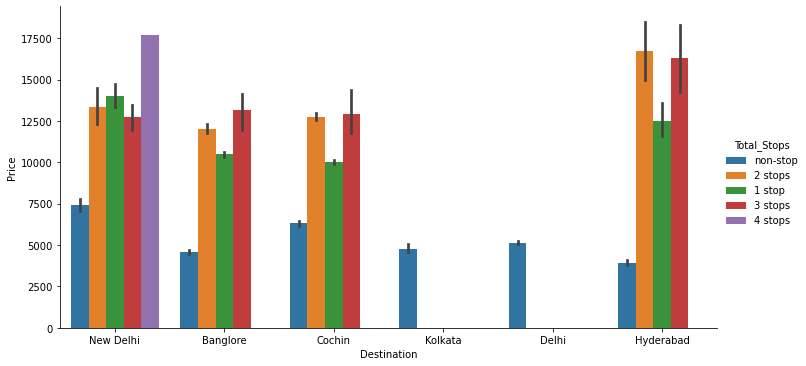

In [282]:
sns.catplot(x='Destination',y='Price',hue= 'Total_Stops', data=df, kind='bar', aspect=2);

Here the data shows that the flights bound for hyderabad with 2 or 3 stops, have a higher price.

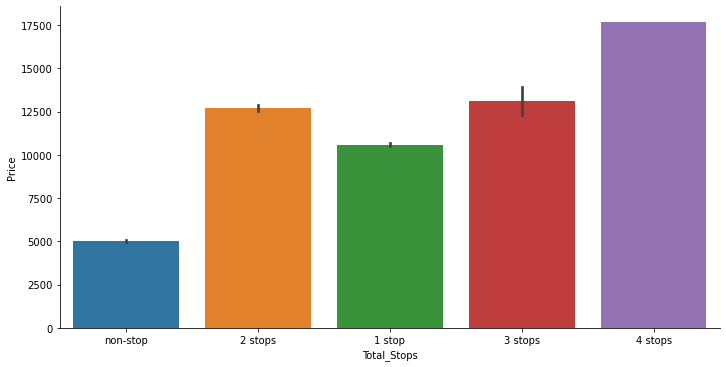

In [283]:
sns.catplot(x='Total_Stops',y='Price', data=df, kind='bar', aspect=2);

The graph shows a positive relation here, as the number of stops increases, the price of flight also increases.

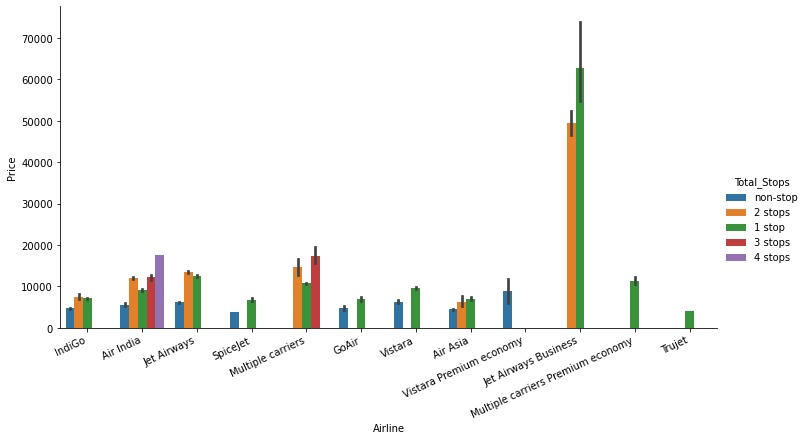

In [284]:
sns.catplot(x='Airline',y='Price',hue= 'Total_Stops', data=df, kind='bar', aspect=2)
plt.xticks(rotation = 25, ha = 'right')
plt.show()

In this graph, we can see that the jet airways business flight with 1 stop is the most expensive among all.

## Encoding

In [285]:
df.dtypes

Airline         object
Source          object
Destination     object
Total_Stops     object
Price            int64
Month            int64
Date             int64
Dep_hr           int64
Dep_min          int64
Arrival_hr       int64
Arrival_min      int64
Duration hr      int32
Duration min     int32
dtype: object

We need to encode the object datatype columns.

In [286]:
# Using one hot encoder for the nominal data.

df= pd.get_dummies(df, columns= ['Airline','Source','Destination'], prefix=['Airline','Source','Destination'])

In [287]:
# using label encoder for the ordinal data.

from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

df['Total_Stops']= enc.fit_transform(df['Total_Stops'].values.reshape(-1,1))

In [288]:
df

,Total_Stops,Price,Month,Date,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration hr,Duration min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,4,4145,4,27,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,4,7229,4,27,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,4,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


Our data is now encoded.

As the data in the dataset are all categorical, we are not checking for outliers or skewness.

## Pre-processing the test data

In [293]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [294]:
# Dropping non-useful columns

test.drop(['Route','Additional_Info'], axis=1, inplace=True)

In [295]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
dtype: int64

No null values present in test set.

In [296]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Duration         2671 non-null   object
 7   Total_Stops      2671 non-null   object
dtypes: object(8)
memory usage: 167.1+ KB


All the columns are of object datatype.

In [297]:
# Processing 'Date of journey' column

test['Date_of_Journey']= pd.to_datetime(test['Date_of_Journey'])
test['Month']=test['Date_of_Journey'].dt.month 
test['Date']=test['Date_of_Journey'].dt.day
test.drop(['Date_of_Journey'],axis=1, inplace=True)

In [298]:
# processing 'Dep time' column

test['Dep_Time']= pd.to_datetime(test['Dep_Time']) 
test['Dep_hr']=test['Dep_Time'].dt.hour
test['Dep_min']=test['Dep_Time'].dt.minute
test.drop(['Dep_Time'], axis=1, inplace=True)

In [299]:
# processing 'Arrival time' column

test['Arrival_Time']= pd.to_datetime(test['Arrival_Time']) 
test['Arrival_hr']=test['Arrival_Time'].dt.hour
test['Arrival_min']=test['Arrival_Time'].dt.minute
test.drop(['Arrival_Time'], axis=1, inplace=True)

In [300]:
# processing 'duration' column

Dura = list(test['Duration'])

for i in range(len(Dura)):
    if len(Dura[i].split()) != 2:
        if "h" in Dura[i]:
            Dura[i] = Dura[i].strip() + " 0m"
        else:
            Dura[i] = "0h " + Dura[i]

In [301]:
test['Dura'] = Dura
test[['Duration hr','Dura_min']] = test.Dura.str.split('h ',1, expand=True)
test[['Duration min','a']] = test.Dura_min.str.split('m',1, expand=True)
test.drop(['Duration','Dura','Dura_min','a'], axis=1, inplace= True)

test['Duration hr']=test['Duration hr'].astype(int)
test['Duration min']=test['Duration min'].astype(int)

In [302]:
test

,Airline,Source,Destination,Total_Stops,Month,Date,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration hr,Duration min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,3,27,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,6,3,4,0,19,15,15,15


In [303]:
for i in range(len(test.columns)):
    print(test.columns[i])
    print(test[test.columns[i]].unique())

Airline
['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Source
['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
Destination
['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
Total_Stops
['1 stop' 'non-stop' '2 stops' '3 stops' '4 stops']
Month
[ 6 12  5  1  3  9  4]
Date
[ 6  5 21 24  3 15 18  4 27]
Dep_hr
[17  6 19  8 23 18  7 15 10 16 13  9  5 21 22 20 14  2 11  3 12  1  4  0]
Dep_min
[30 20 15  0 55 10 50 45 25  5 40 35]
Arrival_hr
[ 4 10 19 21  2 12 22 20 18 16  8  1  9 23 17  0  7 15 13 11  5 14  3  6]
Arrival_min
[25 20  0 45 35 30 55 50 10 15  5 40]
Duration hr
[10  4 23 13  2 18 15  5  6 28  9 17 12 14 11 25 19  7  3  1 27 26  8 21
 16 22 33 24 38 20 35 31 34 29 30 37 36 39 32 40  0]
Duration min
[55  0 45 50 20  5 15 40 10 35 30 25]


Here in test set, we do not have the trujet airways.

In [304]:
# Encoding

test= pd.get_dummies(test, columns= ['Airline','Source','Destination'], prefix=['Airline','Source','Destination'])

test['Total_Stops']= enc.fit_transform(test['Total_Stops'].values.reshape(-1,1))

In [305]:
test

,Total_Stops,Month,Date,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration hr,Duration min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,5,21,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0
3,0,5,21,8,0,21,0,13,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,6,24,23,55,2,45,2,50,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,6,6,20,30,20,25,23,55,0,...,0,0,1,0,1,0,0,0,0,0
2667,4,3,27,14,20,16,55,2,35,0,...,0,0,1,0,1,0,0,0,0,0
2668,0,6,3,21,50,4,25,6,35,0,...,0,1,0,0,0,1,0,0,0,0
2669,0,6,3,4,0,19,15,15,15,0,...,0,1,0,0,0,1,0,0,0,0


Preprocessing done for test set.

In the test set we do not have column for airline_trujet, But it is present in train set.

In [306]:
df['Airline_Trujet'].value_counts()

0    10681
1        1
Name: Airline_Trujet, dtype: int64

But, as we can see trujet airline data is present in only one record of the entire dataset, so we can drop the data column. as, keeping
the column will lead to size mismatch of the two sets.

In [307]:
df.drop(['Airline_Trujet'], axis=1, inplace=True)

### Splitting the train data into target and featurs.

In [308]:
x= df.drop(['Price'], axis=1)
y= df['Price']

## Finding best random state

In [309]:
maxscr=0
maxrs=0
for i in range(1,150):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.2,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.6496881085030775 on random state 57


We found the best score at random state 57

### Creating train and validation split.

In [310]:
# Creating split for training and validation using the random state found best.

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.2,random_state=57)

## Model creation

In [311]:
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.5686362859221027
r2 score:  0.6496881085030775
Mean absolute error: 2032.4249770575102
Mean squared error: 7735943.574923215
Root mean squared error: 2781.356427163411


In [312]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)

print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))

Score:  0.9704806711138513
r2 score:  0.6665610360255287
Mean absolute error: 1389.3604273904227
Mean squared error: 7363338.423840015
Root mean squared error: 2713.5472031715267


In [313]:
from sklearn.ensemble import RandomForestRegressor

fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)

print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))
print('Mean absolute error:', mean_absolute_error(y_test,predfr))
print('Mean squared error:', mean_squared_error(y_test,predfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predfr)))

Score:  0.9512692757379771
r2 score:  0.8019650829501711
Mean absolute error: 1203.2908179829583
Mean squared error: 4373208.507469505
Root mean squared error: 2091.2217738607987


In [204]:
from sklearn.svm import SVR

svr= SVR(kernel= 'linear')
svr.fit(x_train,y_train)
preds= svr.predict(x_test)

print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  0.4202611457749814
r2 score:  0.40495358046429253
Mean absolute error: 2221.684781313379
Mean squared error: 13140420.401711538
Root mean squared error: 3624.9717794365706


In [314]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)

print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))
print('Mean absolute error:', mean_absolute_error(y_test,predls))
print('Mean squared error:', mean_squared_error(y_test,predls))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predls)))

Score:  0.5684290652422209
r2 score:  0.6480525187668368
Mean absolute error: 2030.3900254763341
Mean squared error: 7772062.331432491
Root mean squared error: 2787.8418770497888


In [315]:
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(x_train,y_train)
predx= xg.predict(x_test)

print('Score: ',xg.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predx))
print('Mean absolute error:', mean_absolute_error(y_test,predx))
print('Mean squared error:', mean_squared_error(y_test,predx))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predx)))

Score:  0.9362860222480663
r2 score:  0.8445993298307621
Mean absolute error: 1175.6736088325667
Mean squared error: 3431715.6942559523
Root mean squared error: 1852.489053747944


Here random forest reg and xgboost are giving us a better score and less errors. lets check cv score for over and under fitting.

## Checking cross validation score

In [316]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,cv=5)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  0.582519911486364


In [317]:
scr= cross_val_score(dt,x,y,cv=5)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  0.6958455640051684


In [318]:
scr= cross_val_score(fr,x,y,cv=5)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  0.8029867549289683


In [319]:
scr= cross_val_score(svr,x,y,cv=5)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  0.4140369026517847


In [320]:
scr= cross_val_score(ls,x,y,cv=5)
print('cross validation score for lasso reg model: ', scr.mean())

cross validation score for lasso reg model:  0.58258076402886


In [321]:
scr= cross_val_score(xg,x,y,cv=5)
print('cross validation score for xgboost model: ', scr.mean())

cross validation score for xgboost model:  0.8364767523929167


We can see random forest and xgboost are giving us the best score. Also the difference between the cv score and r2 score is less in both these models as compared to other models. lets hyperparameter tune both and find the best model.

## Hyper parameter tuning

In [207]:
from sklearn.model_selection import RandomizedSearchCV

par= {'criterion':['mse','mae'], 'max_features' : ["auto", "sqrt", "log2"]}

rcvfr= RandomizedSearchCV(fr,par,cv=5) 
rcvfr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']})

In [208]:
rcvfr.best_params_

{'max_features': 'sqrt', 'criterion': 'mae'}

In [322]:
# Now using the above parameter which is found to be best, we create our model.

finalmodel1= RandomForestRegressor(max_features= 'sqrt', criterion= 'mae')
finalmodel1.fit(x_train,y_train)
predf1=finalmodel1.predict(x_test)

print('Score: ',finalmodel1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf1))
print('Mean absolute error:', mean_absolute_error(y_test,predf1))
print('Mean squared error:', mean_squared_error(y_test,predf1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf1)))

Score:  0.935120490056634
r2 score:  0.8074543438566073
Mean absolute error: 1240.9487552643895
Mean squared error: 4251989.063679668
Root mean squared error: 2062.035175180013


With the random forest model we are getting a train score of 93% and an r2 score of 80%. with the errors being less.

In [210]:
from sklearn.model_selection import GridSearchCV

par1= {'max_depth': np.arange(1,10)}

gcvxg= GridSearchCV(xg,par1,cv=5) 
gcvxg.fit(x_train,y_train)
gcvxg.best_params_

{'max_depth': 5}

In [323]:
# Now using the above parameter which is found to be best, we create our model.

finalmodel2= XGBRegressor(max_depth=5)
finalmodel2.fit(x_train,y_train)
predf2=finalmodel2.predict(x_test)

print('Score: ',finalmodel2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf2))
print('Mean absolute error:', mean_absolute_error(y_test,predf2))
print('Mean squared error:', mean_squared_error(y_test,predf2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf2)))

Score:  0.9102017394973851
r2 score:  0.8640346632009188
Mean absolute error: 1182.8877550052828
Mean squared error: 3002524.890401453
Root mean squared error: 1732.77952734947


Using xgboost we are getting a training score of 91% and r2 score of 86% with less erors.

By analysing the models, we can say that XGboost reg is performing slightly better. so we make it our final model.

## Saving the model

In [324]:
import joblib

joblib.dump(finalmodel2,'flight_price_prediction.pkl')

['flight_price_prediction.pkl']

### Loading the model for predicting the test set.

In [325]:
model= joblib.load('flight_price_prediction.pkl')

In [326]:
# Creating dataframe to store the prediction.

Submission = pd.DataFrame()

In [327]:
# Prediction

Submission['Price']=model.predict(test)

In [328]:
# submission data

Submission

,Price
0,11354.715820
1,4568.263672
2,14036.706055
3,10290.169922
4,3651.377930
...,...
2666,9687.947266
2667,5070.033691
2668,17013.339844
2669,13282.398438
